## Importing lib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import impute
import numpy as np
import sweetviz

- sweetviz is the new EDA oriented lib that makes the whole job a lot easier.

## Loading dataset

In [ ]:
train_df = pd.read_csv('input/train.csv', index_col = 'Id')
test_df = pd.read_csv('input/test.csv', index_col = 'Id')

- The data-set used here is the Kaggle home-prices dataset.

## Data insights
The dataframe containing the train and test data would like. We will try to get some basic insights about the entire data.

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The detailed description of the features is given along with the dataset.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [ ]:
train_df.shape

(1460, 80)

In [ ]:
test_df.shape

(1459, 79)

- The data-set consists of 79 features both numeric and categorical with 1460 training examples and 1459 test data

## Missing values in the features in train dataset
Any data set will contain certain missing values in its features, be it numerical features or categorical features. This happens due to many reasons such as unavailability of data, wrong entry of data, etc. We need to check for the missing values in our train dataset. The following visualization can help us in doing it.

In [ ]:
missing = train_df.isnull().sum()

In [ ]:
missing = missing[missing > 0]

In [ ]:
missing.sort_values(inplace = True)

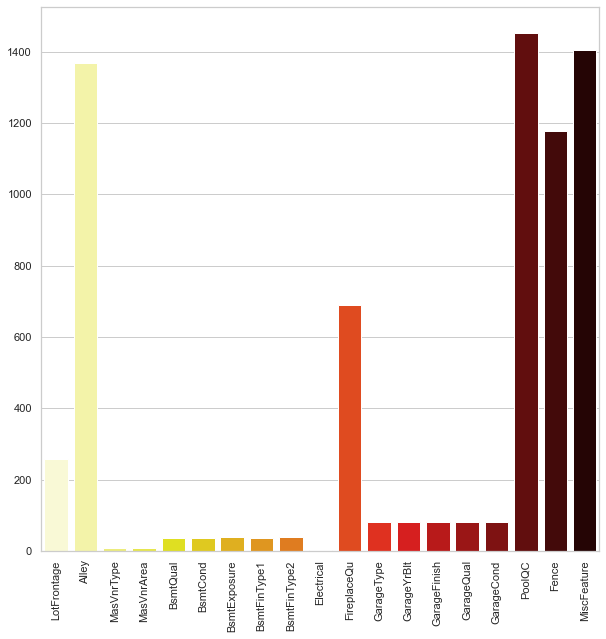

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.barplot(x = missing.index.tolist(), y = missing, palette = 'hot_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

- We can see that the feature PoolQC is having around 90% missing data.
- It is then followed by MiscFeature, Alley, Fence etc.

## Feature segregation into numerical and categorical
There are mainly two types of columns, numerical and categorical. Let’s divide our features in train_df into each of those.

In [ ]:
features_numerical = train_df.select_dtypes(exclude = ['object']).drop(['SalePrice'], axis = 1).copy()

In [ ]:
features_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
features_numerical['MSSubClass']

Id
1       60
2       20
3       60
4       70
5       60
        ..
1456    60
1457    20
1458    70
1459    20
1460    20
Name: MSSubClass, Length: 1460, dtype: int64

In [ ]:
features_categorical = train_df.select_dtypes(include = ['object']).copy()
features_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Visualizations

##  Univariate distribution of features
Let’s see how the data in numerical features are distributed. The distplot gives us the univariate distribution plot of each variable as shown below. These plots also help us in knowing about the skewness of the features and outliers in them, if any.

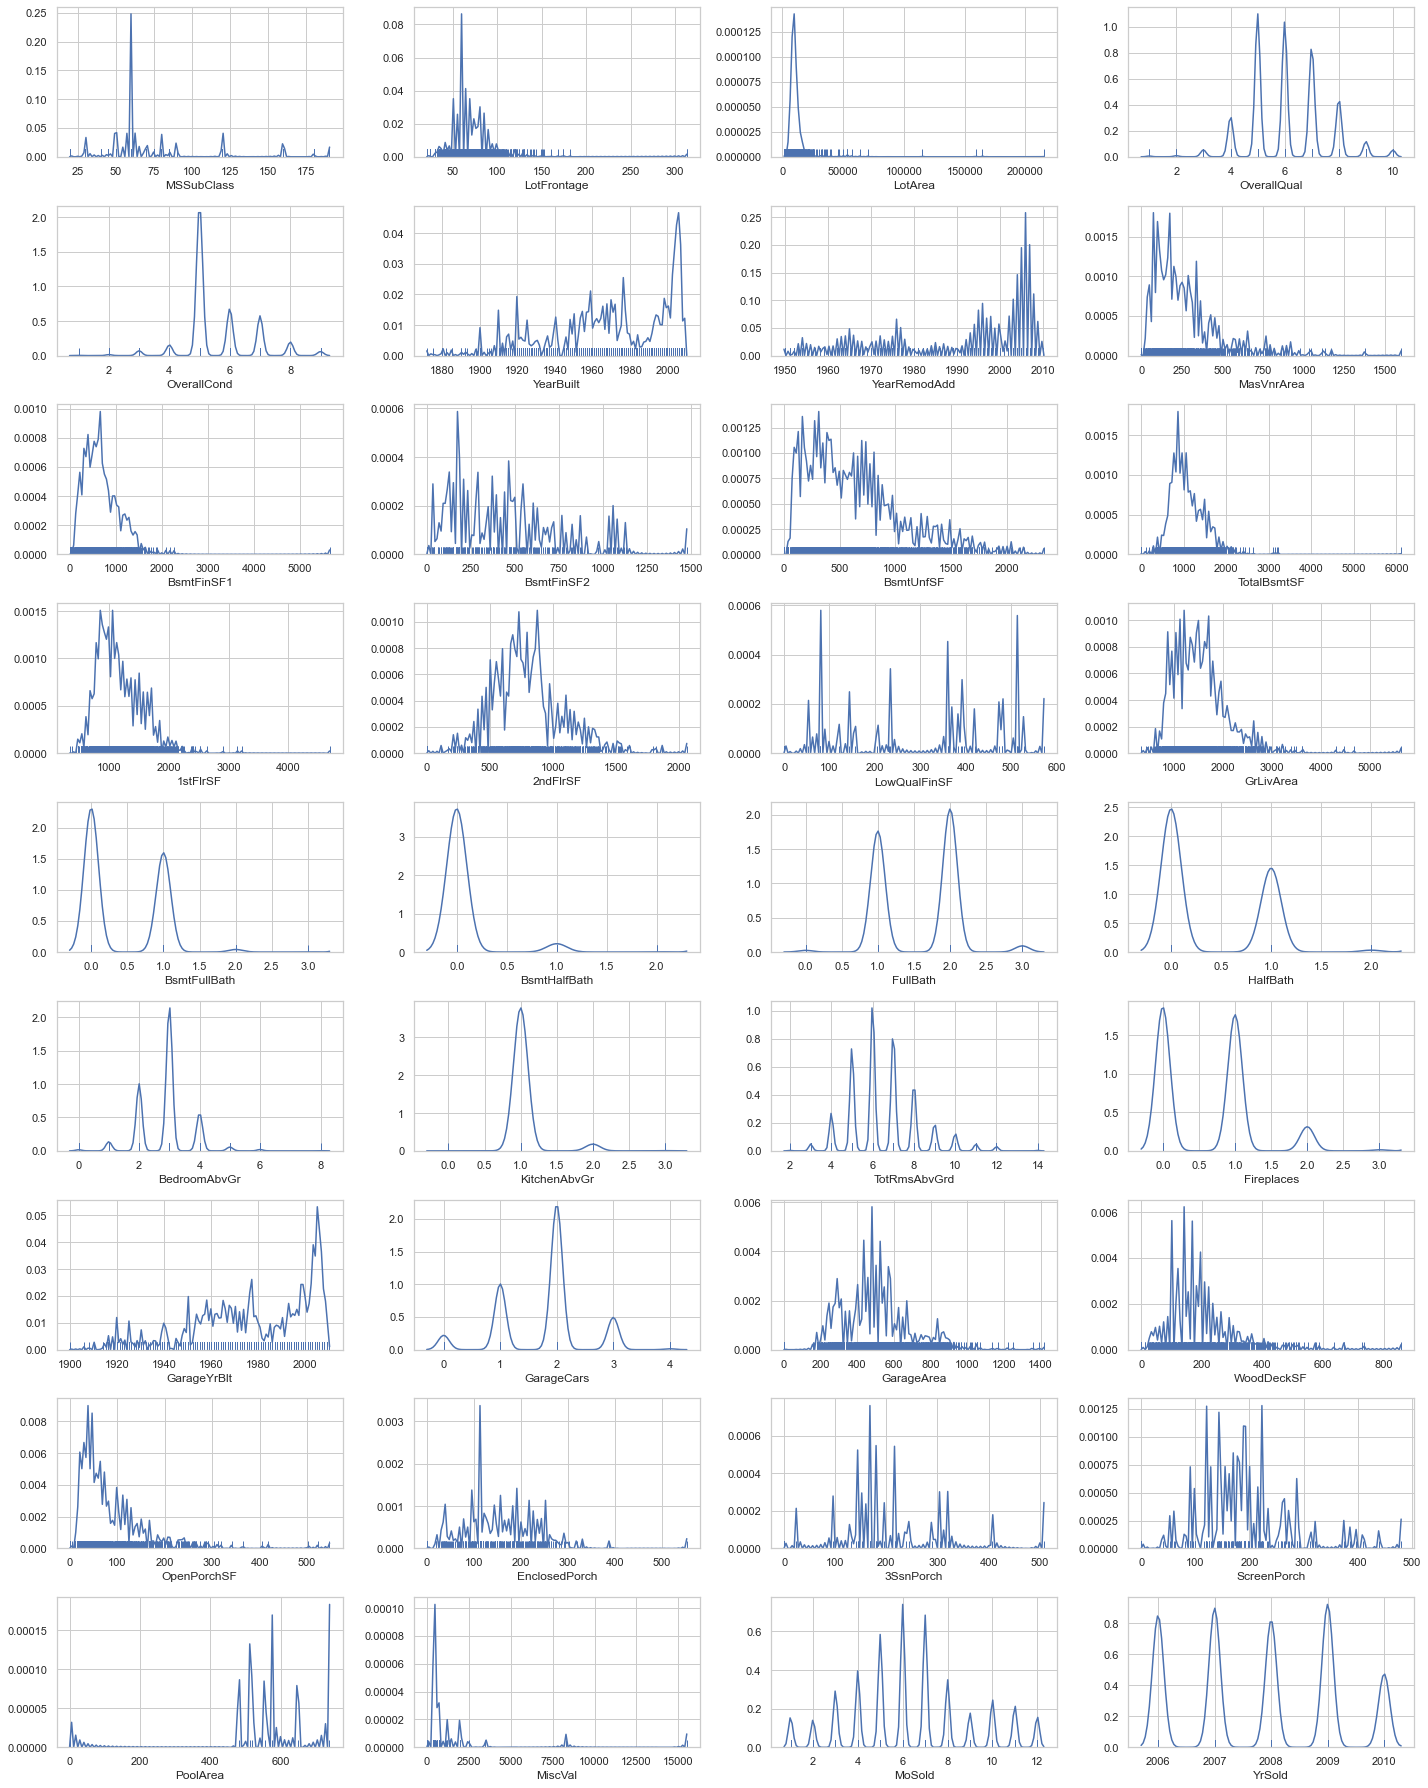

In [ ]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

## Univariate analysis using boxplot
We can’t decide upon the outliers on distribution plots alone. Box plots help us in knowing more about outliers in features. The dots outside the blue box depicts the data-points that pose as outliers.

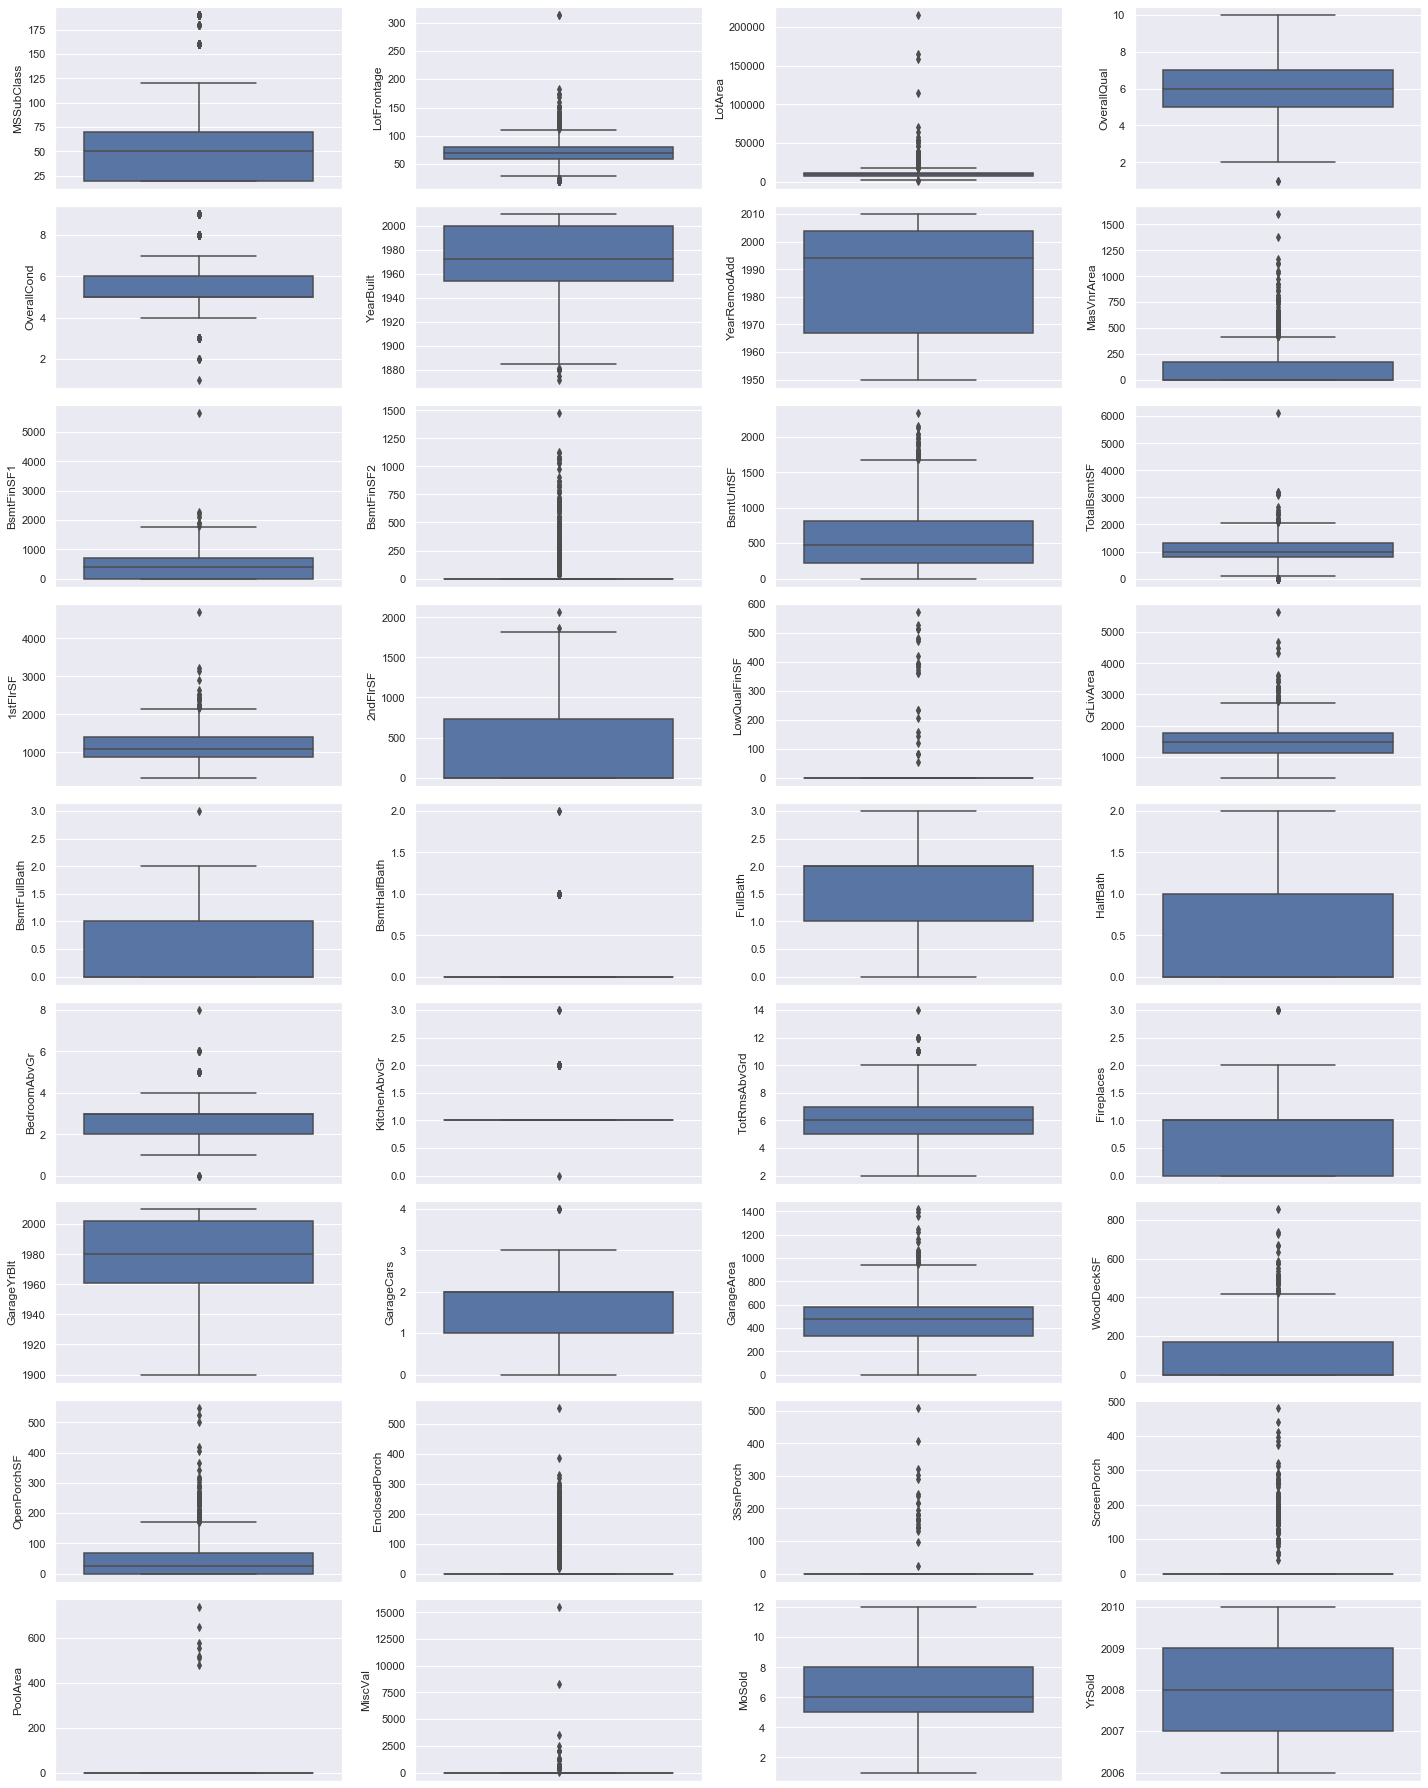

In [ ]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

## Bivariate analysis using scatter plot
We could also plot the features along with the target variable to do bivariate analysis. A scatterplot would do the trick.


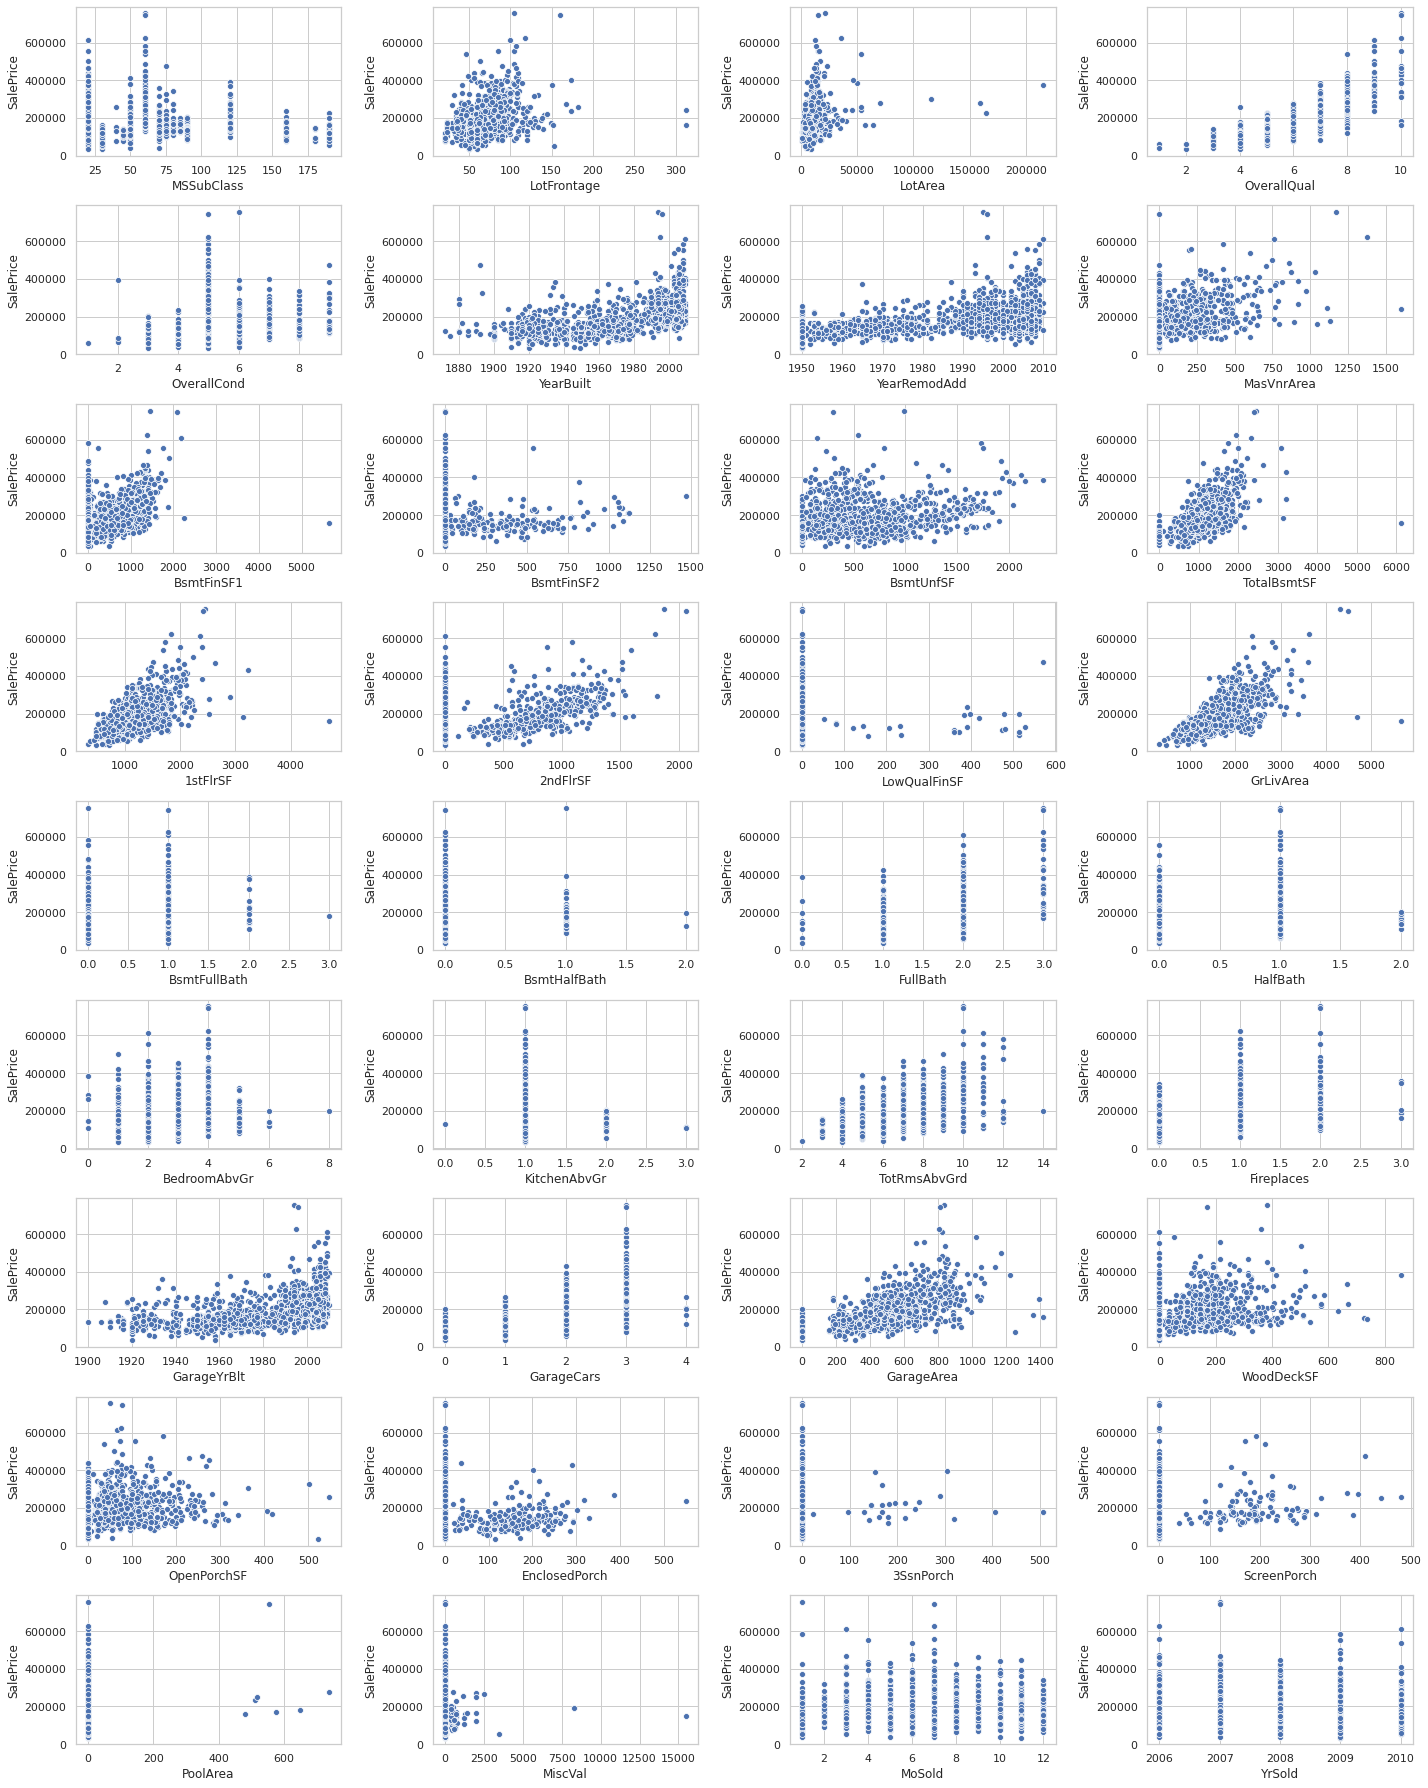

In [ ]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(features_numerical.iloc[:,i].dropna(), train_df.SalePrice)
plt.tight_layout()

## Removing outliers

- From the above visualizations we can see that the below mentioned features have ouliers in them

In [ ]:
outliers = train_df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
                    'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]

- We can verify it agin by plotting regression plots for each of these features.

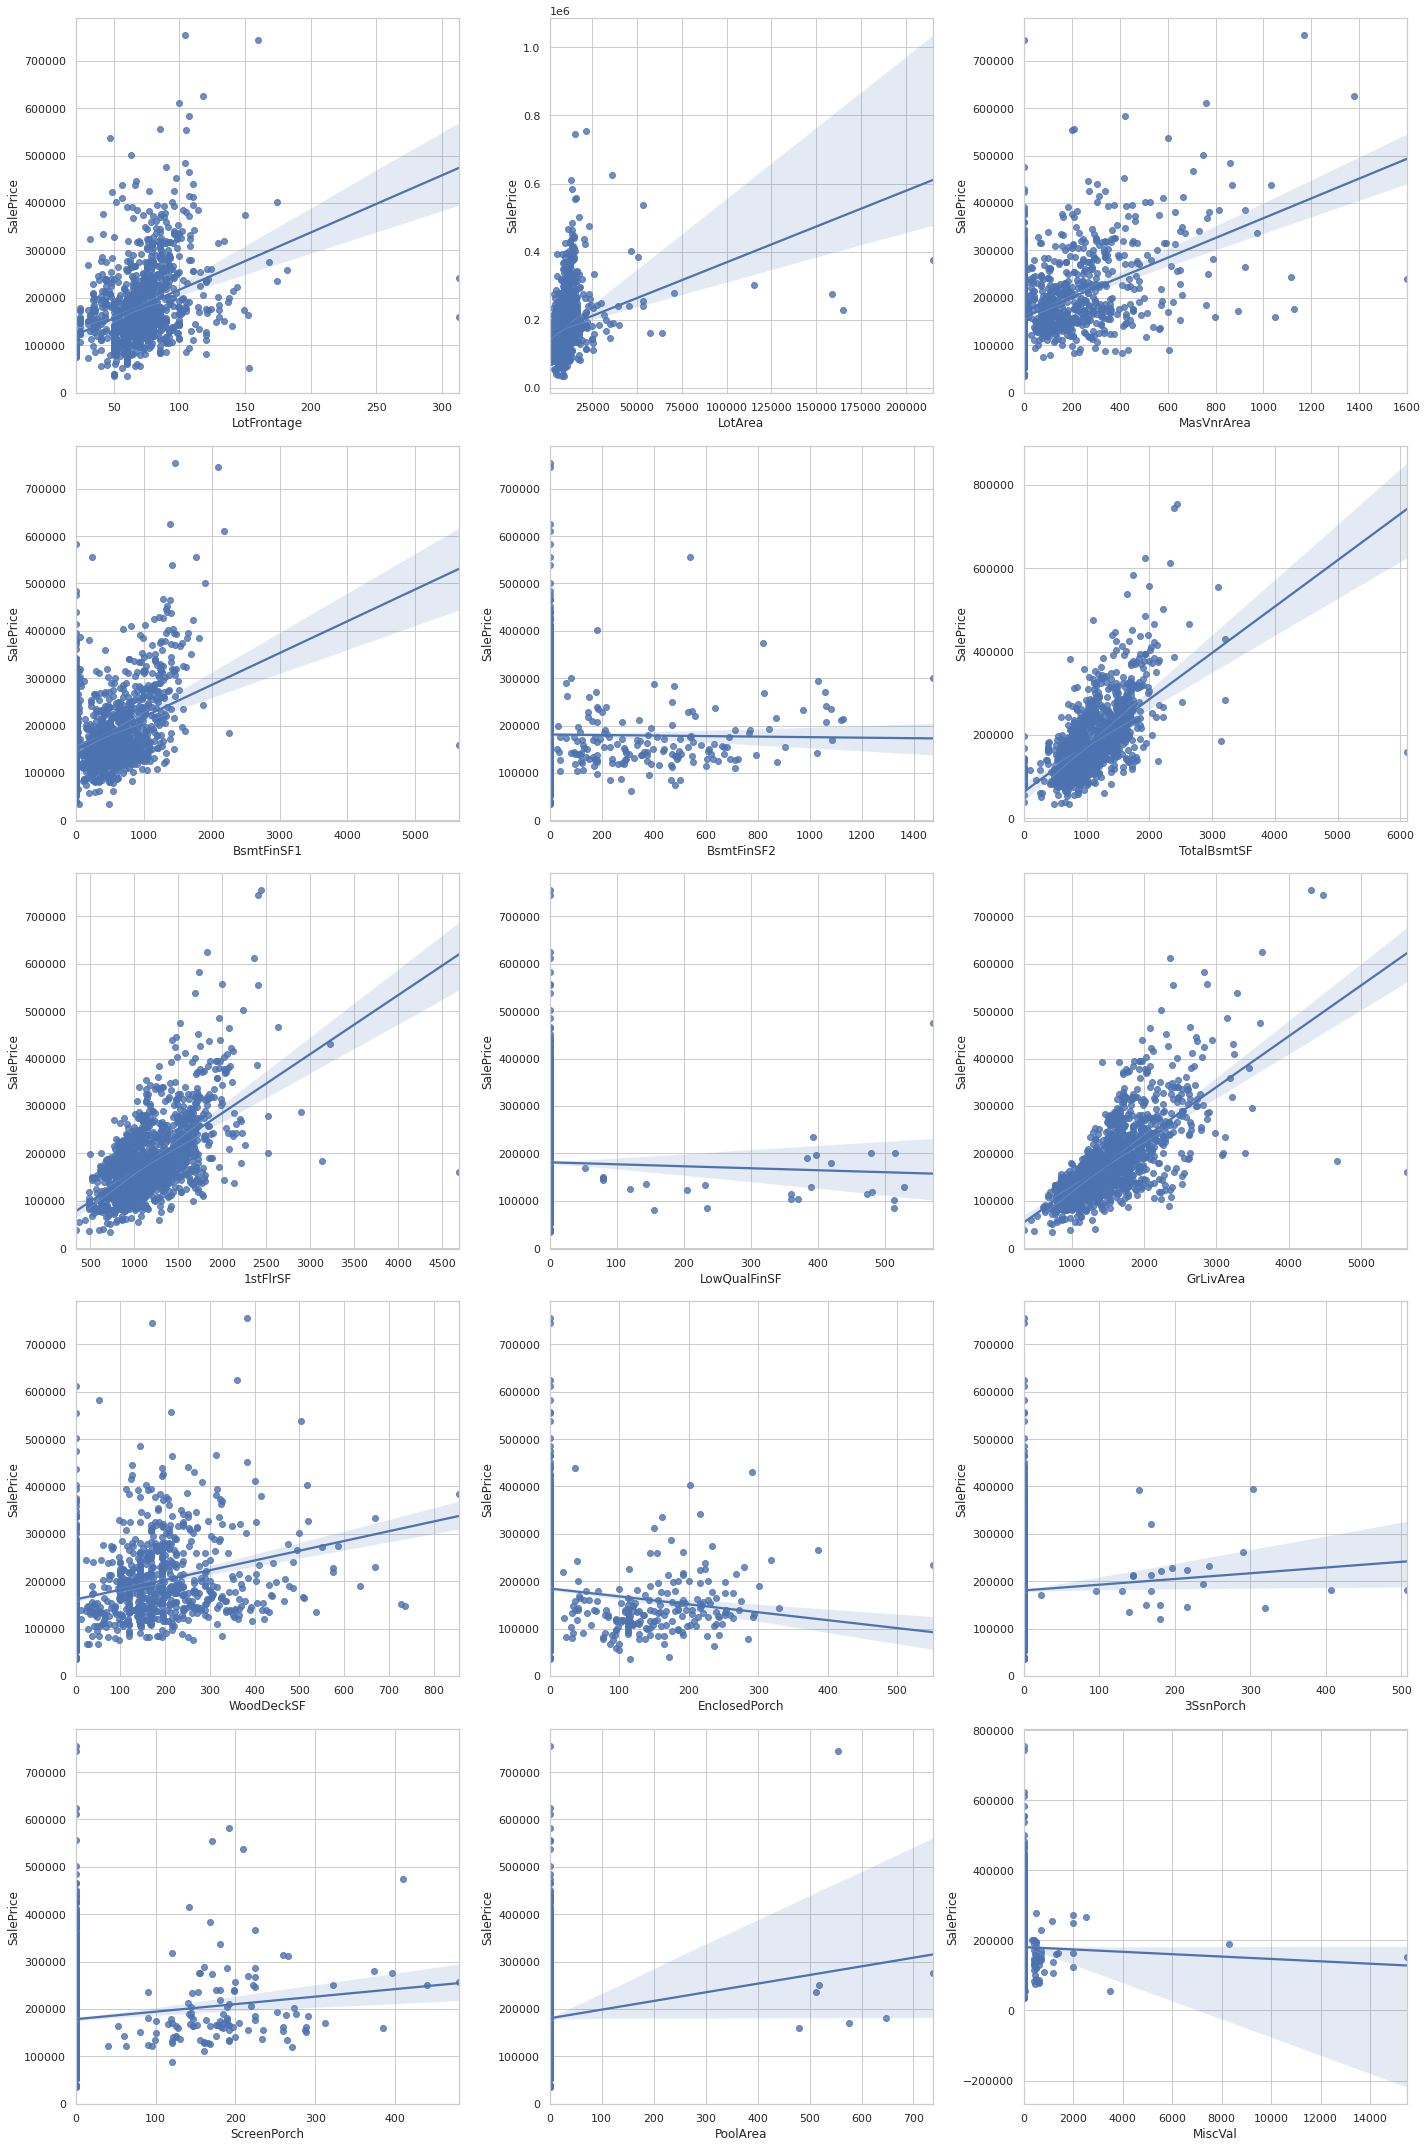

In [ ]:
fig = plt.figure(figsize = (20,30))
for i in range(len(outliers.columns)):
    fig.add_subplot(5, 3, i+1)
    sns.regplot(outliers.iloc[:,i], train_df.SalePrice)
plt.tight_layout()

- We can now confirm that the features are having outliers. The next step will be to remove them. We can get the limits to remove them(from respective features) from the boxplots and regression plots.
- Dropping the outliers by setting limits based on the above visualizations manually.


In [ ]:
train_df.drop(train_df[train_df.LotFrontage > 200].index, inplace = True)

In [ ]:
train_df.drop(train_df[train_df.LotArea > 100000].index, inplace = True)
train_df.drop(train_df[train_df.MasVnrArea > 1250].index, inplace = True)
train_df.drop(train_df[train_df.BsmtFinSF1 > 3000].index, inplace = True)
train_df.drop(train_df[train_df.BsmtFinSF2 > 1250].index, inplace = True)
train_df.drop(train_df[train_df.TotalBsmtSF > 4000].index, inplace = True)
train_df.drop(train_df[train_df['1stFlrSF'] > 4000].index, inplace = True)
train_df.drop(train_df[(train_df.LowQualFinSF > 500) & train_df.SalePrice > 600000].index, inplace = True)
train_df.drop(train_df[(train_df.GrLivArea > 4000) & (train_df.SalePrice < 200000)].index, inplace = True)
train_df.drop(train_df[train_df.WoodDeckSF > 800].index, inplace = True)
train_df.drop(train_df[train_df.EnclosedPorch > 400].index, inplace = True)
train_df.drop(train_df[train_df['3SsnPorch'] > 200].index, inplace = True)
train_df.drop(train_df[(train_df.ScreenPorch > 100) & (train_df.SalePrice > 450000)].index, inplace = True)
train_df.drop(train_df[train_df.PoolArea > 400].index, inplace = True)
train_df.drop(train_df[train_df.MiscVal > 5000].index, inplace = True)

## Dropping unnecessary features

- There might be features in the data-set that won’t be contributing much to the target variable. We need to remove those to get better accuracy. Multiple features having a high correlation with each other may cause over-fitting. Let’s find out the highly correlated features(correlation>0.8). This can be done by a heatmap containing the correlation values of the features.
- Highly correlated features can be dropped to avoid overfitting

In [ ]:
correlation = train_df.select_dtypes(exclude = 'object').corr()

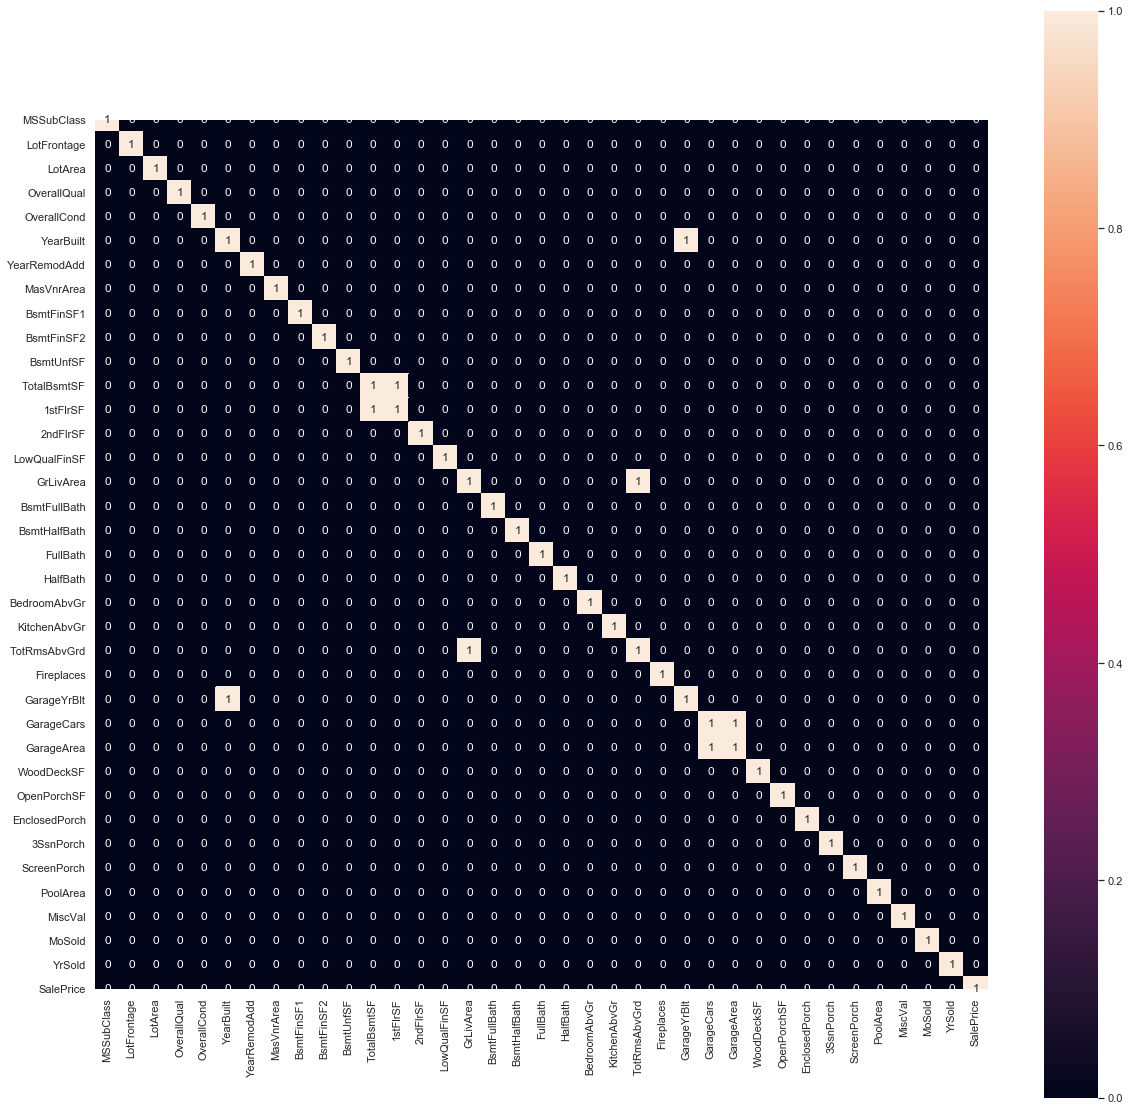

In [ ]:
fig = plt.figure(figsize = (20,20))
sns.heatmap(correlation > 0.8, annot = True, square = True)

- The correlated features are found out. The ones that need to be dropped can be decided by its correlation with the target variable SalePrice.
- From the plot, we can see that the following features are highly correlated with each other:
    + 1stFlrSF & TotalBsmtSF
    + TotRmsAbvGrd & GrdLivArea
    + GarageYrBlt & YearBuilt
    + GarageArea & GarageCars
- Removing any one feature in each of these four sets would be sufficient. We can decide on which one to remove by looking into its contribution to the target variable SalePrice. This can be done by checking its correlation with SalePrice.

In [ ]:
correlation.SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

- Dropping the features

In [ ]:
train_df.drop(columns = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'], axis = 1, inplace = True)

In [ ]:
test_df.drop(columns = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'], axis = 1, inplace = True)

-  Calculating the percentage missing values for the features

In [ ]:
train_df.isnull().mean().sort_values(ascending = False).head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

- The PoolWc feature is having 100% missing values
- MiscFeature follows with 96.6%
- We will be dropping all the featres having more than 90% missing values

In [ ]:
train_df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley'], axis = 1, inplace = True)

In [ ]:
test_df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley'], axis = 1, inplace = True)

- I have plotted the scatter plot once again to check for any features that is of not much use to us.

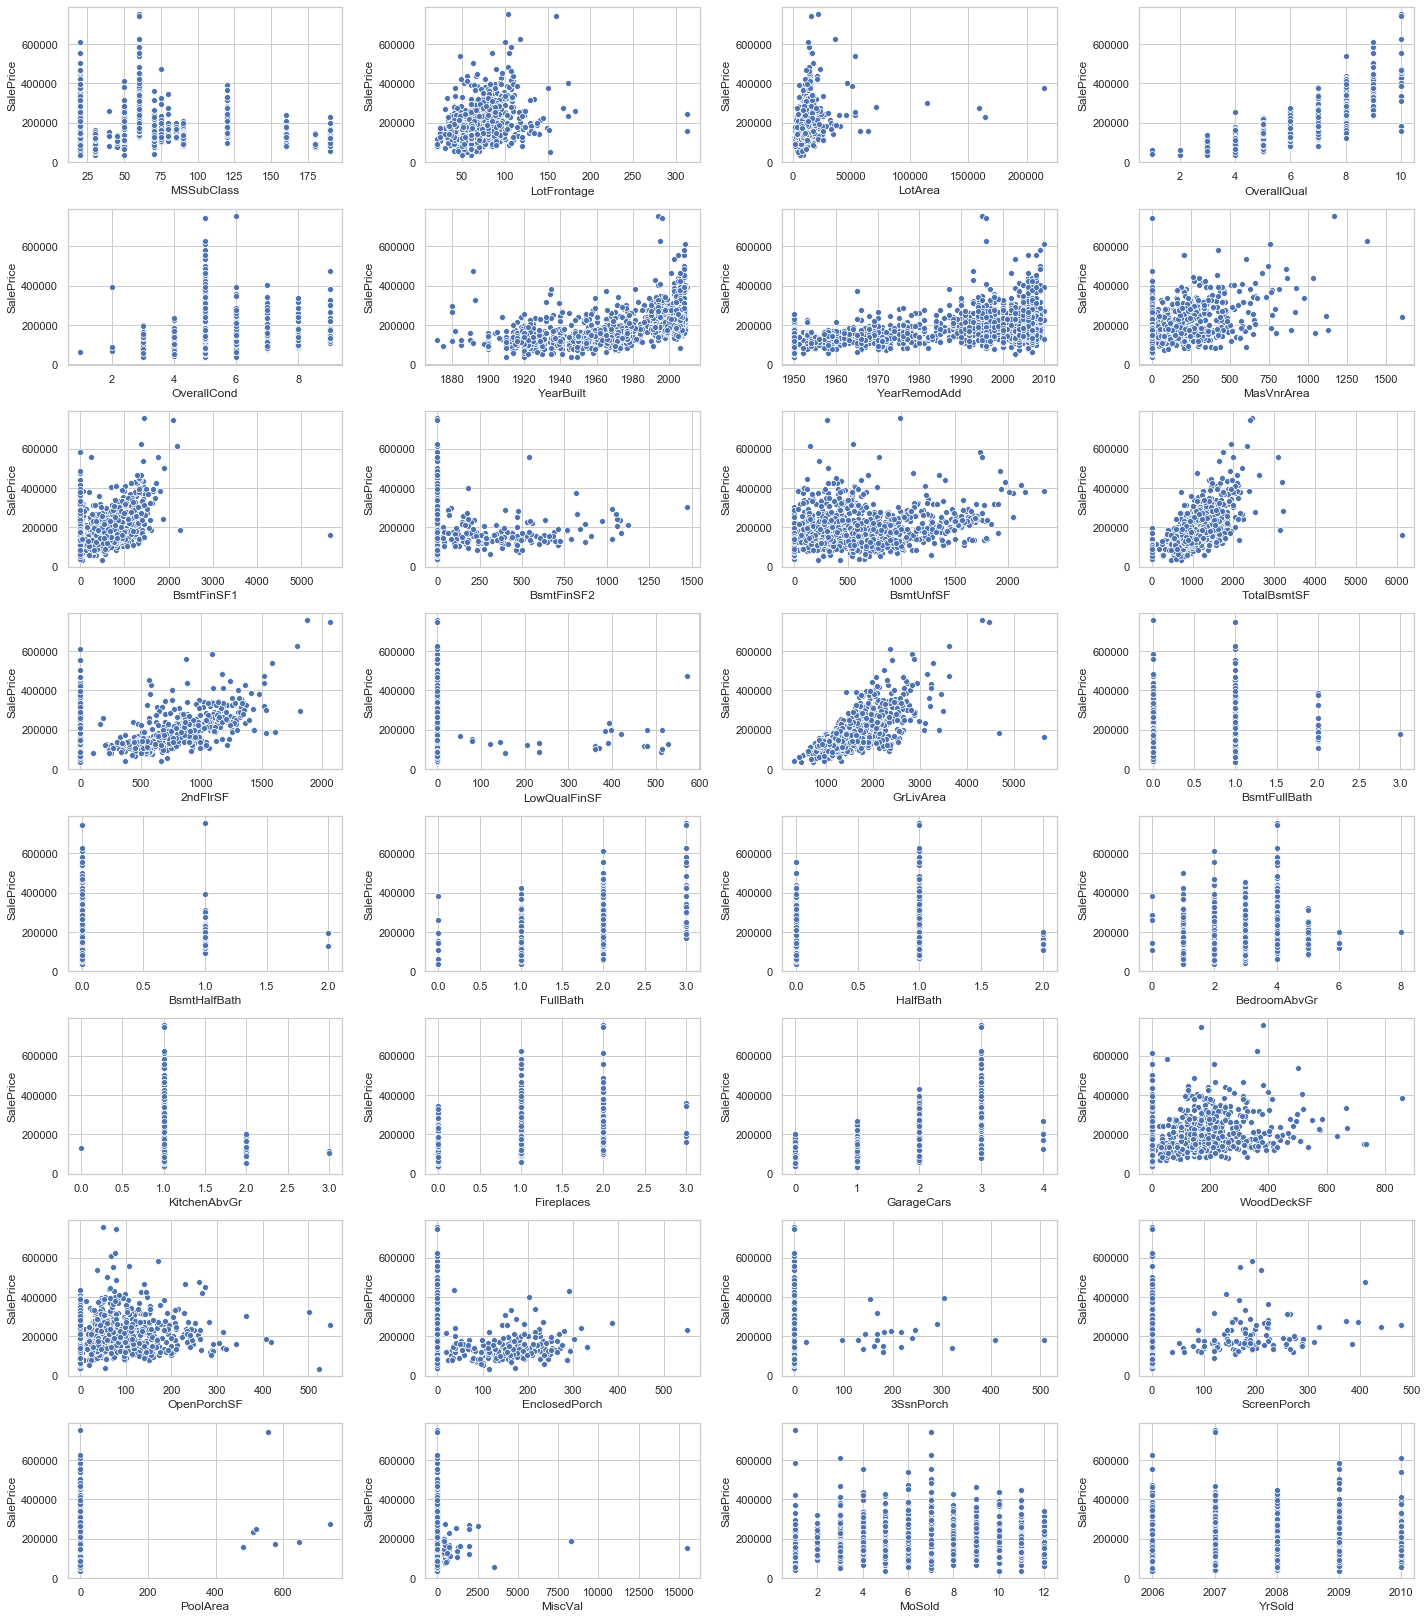

In [ ]:
features_numerical = train_df.select_dtypes(exclude = ['object']).drop(['SalePrice'], axis = 1).copy()
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(features_numerical.iloc[:,i].dropna(), train_df.SalePrice)
plt.tight_layout()

- The feature PoolArea is having only 0 as its entry, so it is better to drop it.

In [ ]:
train_df.drop(columns = ['PoolArea'], axis = 1, inplace = True)

In [ ]:
test_df.drop(columns = ['PoolArea'], axis = 1, inplace = True)

- While droppping features make sure to drop it from both the train and test features.

## Replacing missing values in numerical features

- I am considering only numerical features initally
- Calculate the means

In [ ]:
train_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False).head()

LotFrontage    0.177397
MasVnrArea     0.005479
SalePrice      0.000000
YrSold         0.000000
LotArea        0.000000
dtype: float64

- We can see that the features LotFrontage and MasVnrArea having missing features. We can replace them with their mean value using the inbuilt reputation functions from sklearn.
- I will be using sklearn's SimpleImputer to impute the missing values.

In [ ]:
imp = impute.SimpleImputer()
train_df.LotFrontage = imp.fit_transform(np.array(train_df.LotFrontage).reshape(-1,1))

In [ ]:
train_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False).head()

MasVnrArea     0.005602
SalePrice      0.000000
YrSold         0.000000
LotFrontage    0.000000
LotArea        0.000000
dtype: float64

In [ ]:
imp = impute.SimpleImputer()
train_df.MasVnrArea = imp.fit_transform(np.array(train_df.MasVnrArea).reshape(-1,1))

- Checking for any more missing values in the train dataset numerical features.

In [ ]:
train_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

SalePrice        0.0
YrSold           0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
Fireplaces       0.0
GarageCars       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
MiscVal          0.0
MoSold           0.0
MSSubClass       0.0
dtype: float64

- Once we are done with train dataset we will be checking the test dataset numerical features.
- We will be using the same method used in the train dataset.

In [ ]:
test_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

LotFrontage      0.155586
MasVnrArea       0.010281
BsmtFullBath     0.001371
BsmtHalfBath     0.001371
GarageCars       0.000685
BsmtFinSF1       0.000685
BsmtFinSF2       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
LowQualFinSF     0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
2ndFlrSF         0.000000
YrSold           0.000000
GrLivArea        0.000000
MoSold           0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
Fireplaces       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
MiscVal          0.000000
MSSubClass       0.000000
dtype: float64

In [ ]:
imp = impute.SimpleImputer()
test_df.LotFrontage = imp.fit_transform(np.array(test_df.LotFrontage).reshape(-1,1))

In [ ]:
imp = impute.SimpleImputer()
test_df.MasVnrArea = imp.fit_transform(np.array(test_df.MasVnrArea).reshape(-1,1))

In [ ]:
test_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

BsmtFullBath     0.001371
BsmtHalfBath     0.001371
GarageCars       0.000685
BsmtFinSF1       0.000685
BsmtFinSF2       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
LowQualFinSF     0.000000
LotFrontage      0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.000000
2ndFlrSF         0.000000
YrSold           0.000000
GrLivArea        0.000000
MoSold           0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
Fireplaces       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
MiscVal          0.000000
MSSubClass       0.000000
dtype: float64

In [ ]:
col = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
for i in col:
    imp = impute.SimpleImputer()
    test_df[i] = imp.fit_transform(np.array(test_df[i]).reshape(-1,1))


In [ ]:
test_df.select_dtypes(exclude = 'object').isna().mean().sort_values(ascending = False)

YrSold           0.0
GrLivArea        0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
BsmtFullBath     0.0
MoSold           0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
Fireplaces       0.0
GarageCars       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
MiscVal          0.0
MSSubClass       0.0
dtype: float64

- We have done replacing all the missing values in the numeric features.

## Replacing missing values in categorical features

- We will be cheking the distribution of the categorical features first using countplot.

In [ ]:
features_categorical = train_df.select_dtypes(include = 'object')
features_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

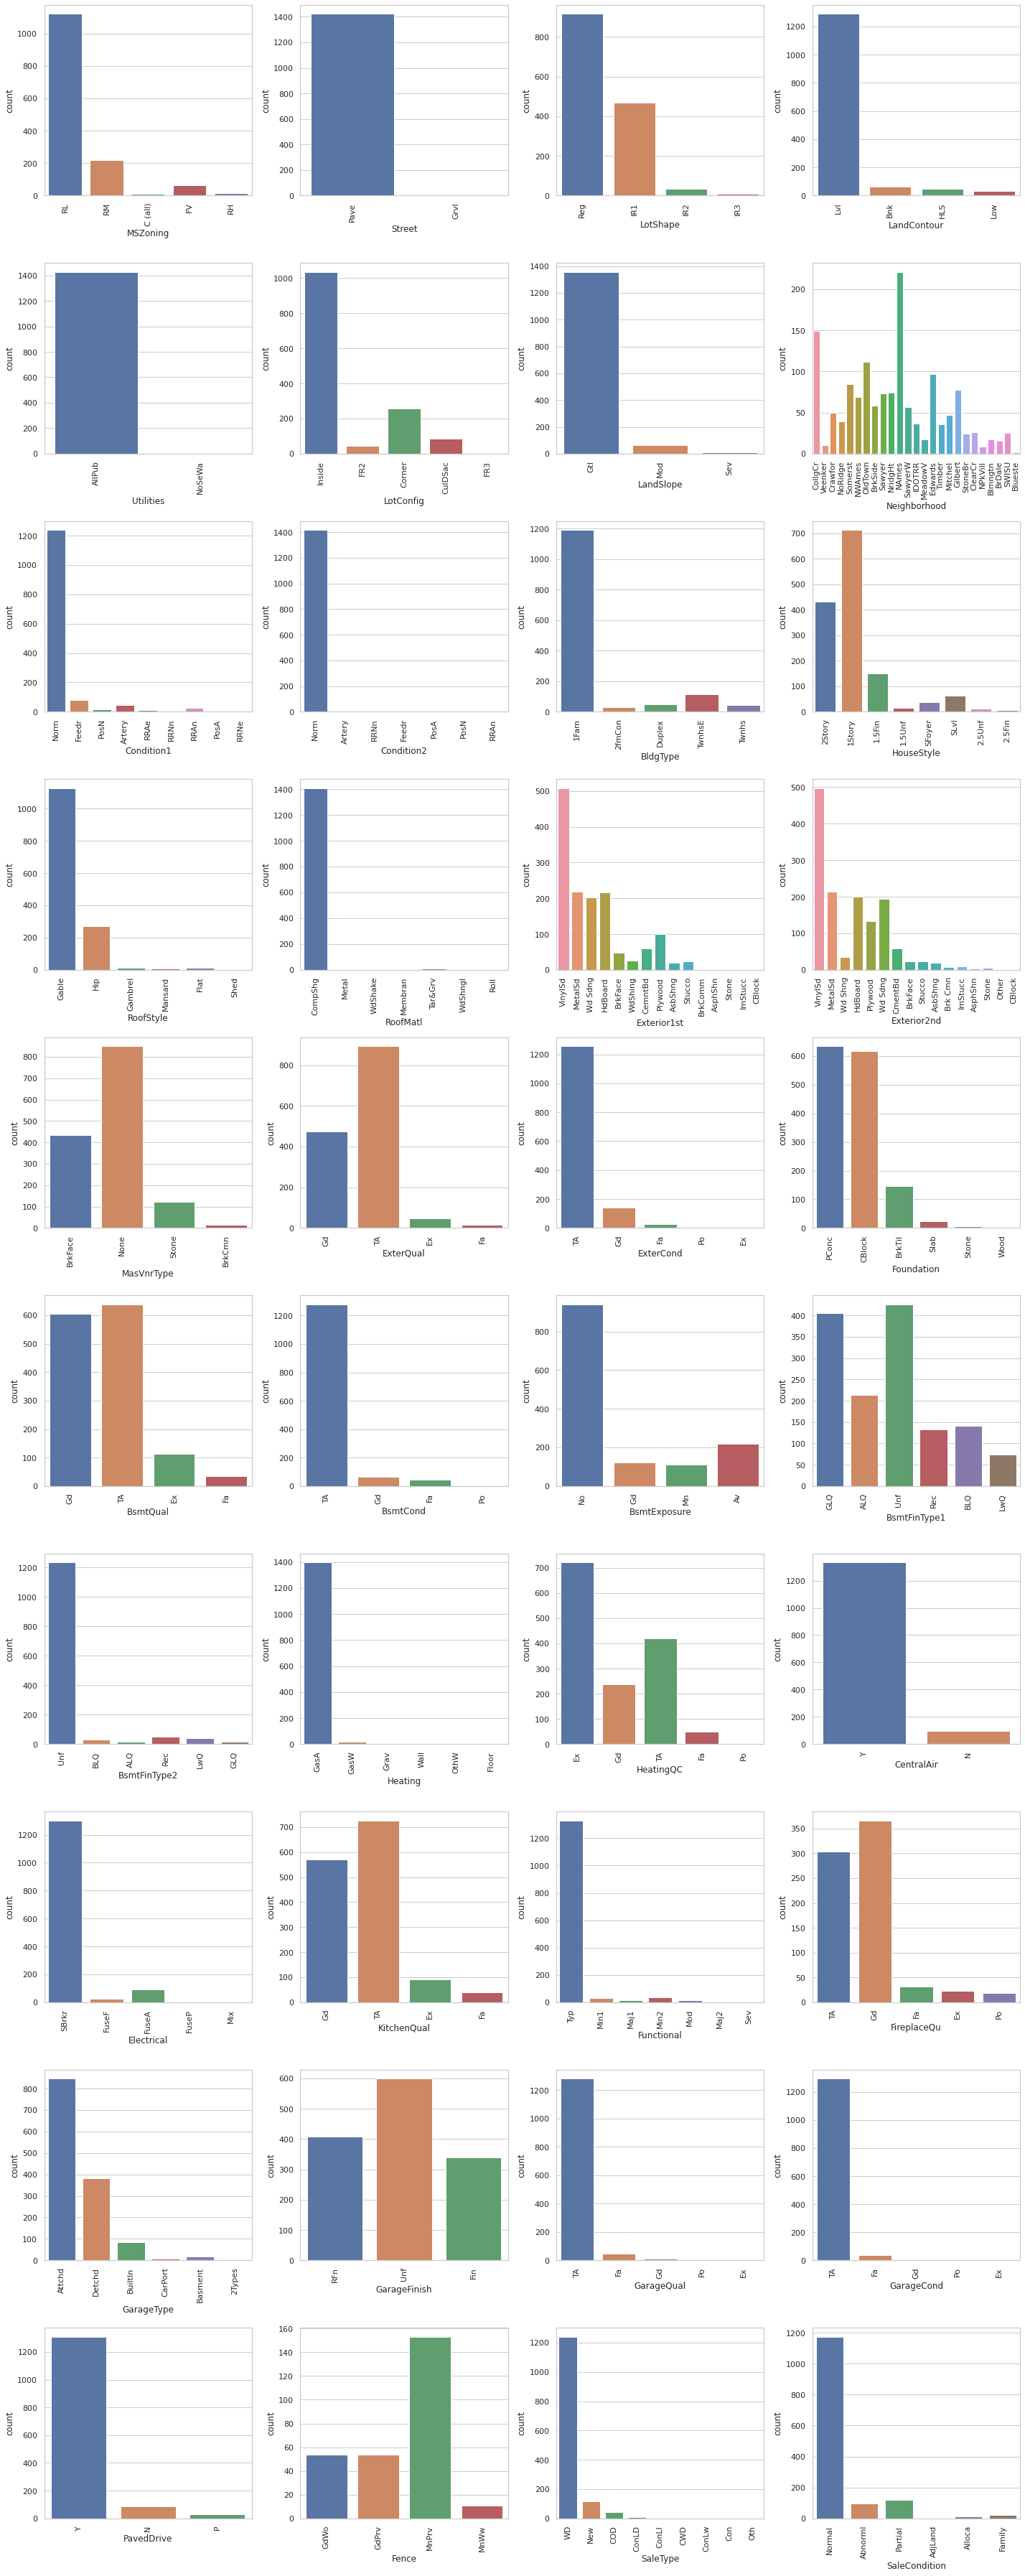

In [ ]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

- Checking the count of missing values

In [ ]:
features_categorical.describe().T.freq.sort_values(ascending = False)

Utilities        1427
Street           1423
Condition2       1415
RoofMatl         1407
Heating          1397
LandSlope        1356
CentralAir       1333
Functional       1329
PavedDrive       1309
Electrical       1302
GarageCond       1295
LandContour      1289
GarageQual       1282
BsmtCond         1279
ExterCond        1256
SaleType         1240
Condition1       1238
BsmtFinType2     1233
BldgType         1190
SaleCondition    1174
RoofStyle        1126
MSZoning         1121
LotConfig        1035
BsmtExposure      940
LotShape          916
ExterQual         893
MasVnrType        849
GarageType        846
KitchenQual       726
HeatingQC         721
HouseStyle        713
BsmtQual          638
Foundation        634
GarageFinish      599
Exterior1st       508
Exterior2nd       497
BsmtFinType1      426
FireplaceQu       366
Neighborhood      221
Fence             153
Name: freq, dtype: object

- Utilities is having 1427 missing points followed by Street, Condition2 etc.
- I have decided to remove all the features having more than 1400 missing features as the total traing examples is 1428.
- I have included Heating as it contains 1397 missing values.

In [ ]:
train_df.drop(columns = ['Utilities', 'Street', 'Condition2', 'RoofMatl'], axis = 1, inplace = True)
test_df.drop(columns = ['Utilities', 'Street', 'Condition2', 'RoofMatl'], axis = 1, inplace = True)

- Fill all the other feature's missing values by a new category called 'None'.

In [ ]:
train_df.fillna('None', inplace = True)

In [ ]:
train_df.select_dtypes(include = 'object').isna().mean().sort_values(ascending = False)

SaleCondition    0.0
SaleType         0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofStyle        0.0
HouseStyle       0.0
BldgType         0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
LandContour      0.0
LotShape         0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
FireplaceQu      0.0
Fence            0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageFinish     0.0
GarageType       0.0
Functional       0.0
BsmtFinType1     0.0
KitchenQual      0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
BsmtFinType2     0.0
MSZoning         0.0
dtype: float64

- Do the same for test dataset.
- Check the percentage missing values for the features in test dataset.

In [ ]:
test_df.select_dtypes(include = 'object').isna().mean().sort_values(ascending = False)

Fence            0.801234
FireplaceQu      0.500343
GarageCond       0.053461
GarageQual       0.053461
GarageFinish     0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtQual         0.030158
BsmtExposure     0.030158
BsmtFinType2     0.028787
BsmtFinType1     0.028787
MasVnrType       0.010966
MSZoning         0.002742
Functional       0.001371
Exterior2nd      0.000685
KitchenQual      0.000685
SaleType         0.000685
Exterior1st      0.000685
HouseStyle       0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
HeatingQC        0.000000
RoofStyle        0.000000
Heating          0.000000
PavedDrive       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
Electrical       0.000000
CentralAir       0.000000
SaleCondition    0.000000
dtype: float64

In [ ]:
test_df.fillna('None', inplace = True)

In [ ]:
test_df.select_dtypes(include = 'object').isna().mean().sort_values(ascending = False)

SaleCondition    0.0
SaleType         0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofStyle        0.0
HouseStyle       0.0
BldgType         0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
LandContour      0.0
LotShape         0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
FireplaceQu      0.0
Fence            0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageFinish     0.0
GarageType       0.0
Functional       0.0
BsmtFinType1     0.0
KitchenQual      0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
BsmtFinType2     0.0
MSZoning         0.0
dtype: float64

## Using sweetviz lib for automatic EDA

In [ ]:
train_df = pd.read_csv('input/train.csv', index_col = 'Id')
test_df = pd.read_csv('input/test.csv', index_col = 'Id')

- Creating a HTML report of both the datasets.

In [ ]:
!pip install sweetviz

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/trungtv/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/trungtv/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/trungtv/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/trungtv/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/trungt

- Saving the HTML report in our directory.

In [ ]:
import sweetviz
report = sweetviz.compare([train_df, 'Train'], [test_df, 'Test'], 'SalePrice')

In [ ]:
report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
